# Final Project 3

In this project, the exploratory analysis plan developed for the Final project. This will lay the groundwork for the model to be executed in Final project 4. 

### Step 1: Loading the python libraries needed for this project 

In [123]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Reading the data set 

In [152]:
#Read in data from source 
df_raw = pd.read_csv("./datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print df_raw.head()

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ...   DeviceProtection  \
0  No phone service             DSL             No  ...                 No   
1                No             DSL            Yes  ...                Yes   
2                No             DSL            Yes  ...                 No   
3  No phone service             DSL            Yes  ...                Yes   
4                No     Fiber optic             No  ...                 No   

  TechSupport StreamingTV StreamingMovies        C

#### Observations in data set

In [153]:
df_raw.count()

customerID          7032
gender              7032
SeniorCitizen       7032
Partner             7032
Dependents          7032
tenure              7032
PhoneService        7032
MultipleLines       7032
InternetService     7032
OnlineSecurity      7032
OnlineBackup        7032
DeviceProtection    7032
TechSupport         7032
StreamingTV         7032
StreamingMovies     7032
Contract            7032
PaperlessBilling    7032
PaymentMethod       7032
MonthlyCharges      7032
TotalCharges        7032
Churn               7032
dtype: int64

We can find 7032 for each column and no empty rows or cells 

#### Summary table

In [154]:
df_raw.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [155]:
col_names = df_raw.columns.tolist()
col_names

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

Given the fact that the majority of the columns have strings in their information the best way to anlayze the data we have and create hisotrgrams and correlation matrices around it will be if we translate each category as a number so it can be quantifiable. 

-The data was divided in 3 sets, one with binary models that include yes or no statements 

-One set with yes, no or NA sets 

-A last set with multiple categories around it

They will be transformed below: 



### Changing yes/no for binary models

In [156]:
df_raw['Partner']=df_raw['Partner'].replace({'Yes': 1, 'No': 0})
df_raw['Dependents']=df_raw['Dependents'].replace({'Yes': 1, 'No': 0})
df_raw['PhoneService']=df_raw['PhoneService'].replace({'Yes': 1, 'No': 0})
df_raw['PaperlessBilling']=df_raw['PaperlessBilling'].replace({'Yes': 1, 'No': 0})
df_raw['Churn']=df_raw['Churn'].replace({'Yes': 1, 'No': 0})

### Changing multiple answers to numerical sets

In [157]:
df_raw['MultipleLines']=df_raw['MultipleLines'].replace({'Yes': 1, 'No': 0, 'No phone service': 2})
df_raw['OnlineSecurity']=df_raw['OnlineSecurity'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
df_raw['OnlineBackup']=df_raw['OnlineBackup'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
df_raw['DeviceProtection']=df_raw['DeviceProtection'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
df_raw['TechSupport']=df_raw['TechSupport'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
df_raw['StreamingTV']=df_raw['StreamingTV'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})
df_raw['StreamingMovies']=df_raw['StreamingMovies'].replace({'Yes': 1, 'No': 0, 'No internet service': 2})

### Changing multiple answers to numerical sets II

In [158]:
df_raw['gender']=df_raw['gender'].replace({'Male': 0, 'Female': 1})
df_raw['InternetService']=df_raw['InternetService'].replace({'DSL': 0, 'Fiber optic': 1, 'No': 2})
df_raw['Contract']=df_raw['Contract'].replace({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
df_raw['PaymentMethod']=df_raw['PaymentMethod'].replace({'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)':3})

The result of the transformation can be found here: 

In [159]:
df_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,2,0,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,0,0,0,0,34,1,0,0,1,...,1,0,0,0,1,0,1,56.95,1889.50,0
2,3668-QPYBK,0,0,0,0,2,1,0,0,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,2,0,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,0,70.70,151.65,1


### Histogram creation 

Once the data was trasnformed we can visually see how is the distribution throught the creation of histograms 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c231a9050>,
      dtype=object)

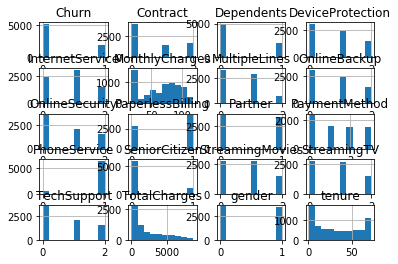

In [160]:
df_raw.hist()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c23a41350>],
      dtype=object)

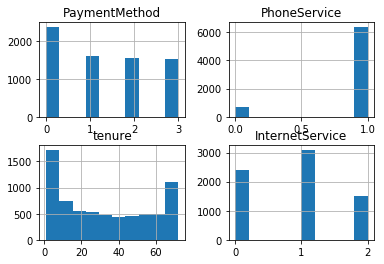

In [178]:
fig, axes = plt.subplots(2, 2)

df_raw.hist('PhoneService', ax=axes[0,1])
df_raw.hist('InternetService', ax=axes[1,1])
df_raw.hist('PaymentMethod', ax=axes[0,0])
df_raw.hist('tenure', ax=axes[1,0])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c24f32950>],
      dtype=object)

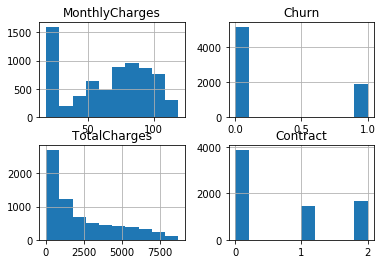

In [176]:
fig, axes = plt.subplots(2, 2)

df_raw.hist('Churn', ax=axes[0,1])
df_raw.hist('Contract', ax=axes[1,1])
df_raw.hist('MonthlyCharges', ax=axes[0,0])
df_raw.hist('TotalCharges', ax=axes[1,0])

-It can be seen from here that the majority of the users have are in a monthly basis 

-That the Monthly we have a high representation in the lower bracket of the spectrum 

-Regarding the total charges the same trend can be found 

-And surpringsingly there is a high number of users that have left already. 

-Regarding payment methods is equally distributed with a higher concentration for electronic checks 

-One conclusion that can be taken from here already is why do they have so many users in a month to month basis, how they can move that commitment to a year or 2 contract 

-Other aspect is how can they move that segment with no internet service to have it with the company.

#### Box Plots creation

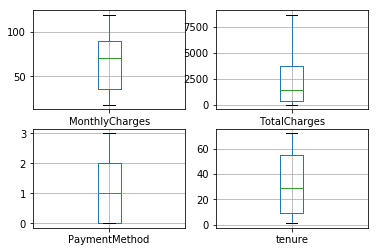

In [182]:
fig, axes = plt.subplots(2, 2)

df_raw.boxplot('TotalCharges', ax=axes[0,1])
df_raw.boxplot('tenure', ax=axes[1,1])
df_raw.boxplot('MonthlyCharges', ax=axes[0,0])
df_raw.boxplot('PaymentMethod', ax=axes[1,0])

-Joining the histograms with this information it can be seen how even though the majority of the users are in a month to motnh contract the median tenure is 30 months 

-So the conclusion of this part is that some efforts need to be done in order to increase the upgrades to a higher commitment

-Even though there is a big set of users that are not paying higher than 30 dollars the median amount for monthly charges is around 60. So is this related to which type of services of type of contracts and how this can be understood better. 

-There is a set of outliers that are paying way highers amounts of money in their annual totals. Who are these people and which are their characteristics 

In [161]:
df_raw.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.495307,0.162400,0.482509,0.298493,32.421786,0.903299,0.615330,0.872582,0.718857,0.777162,0.776166,0.722412,0.816695,0.820677,0.688567,0.592719,1.315557,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.655867,0.737271,0.796556,0.778188,0.778542,0.795571,0.762952,0.761287,0.832934,0.491363,1.149523,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [188]:
df_raw_high=df_raw.loc[df_raw["TotalCharges"]>=2000]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c254ce550>,
      dtype=object)

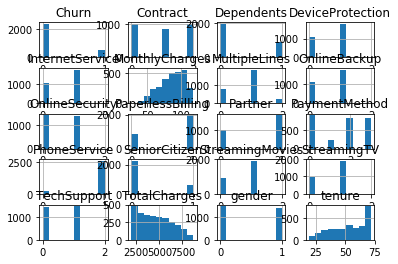

In [190]:
df_raw_high.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c26a8df10>,
      dtype=object)

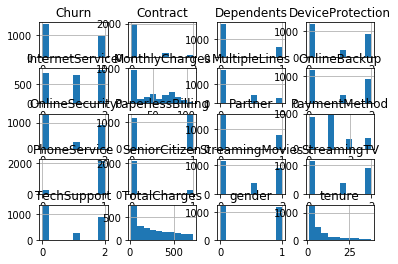

In [194]:
df_raw_low=df_raw.loc[df_raw["TotalCharges"]<=720]
df_raw_low.hist()

From these 2 sets some other conclusions can be said. 

On one side the users that are paying the highest are Internet users and more towards the fiber optics side with a high tenure of the service and more equally distributed between the different types of contract. (But still too high for the monthly one). The majority of these users are not churning at all

On the opposite side of the users whose totals are lower that the monthly median it can be seen that they are mainly users of DSL, no phone service and almost everyone in month to month services. On top of that the are churning almost 50/50 in the distribution. 

The conclusion of this is that one of the main pain points regarding chruning can be found in the montlhy contracts and the type of services they have. 

In [202]:
df_raw_churn=df_raw.loc[df_raw["Churn"]==1]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c29252f10>,
      dtype=object)

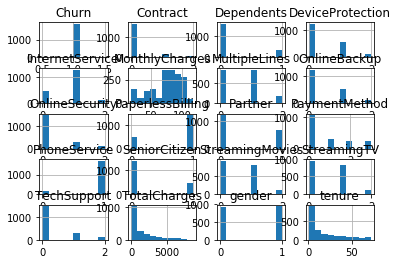

In [203]:
df_raw_churn.hist()

In [165]:
print df_raw.corr()

                    gender  SeniorCitizen   Partner  Dependents    tenure  \
gender            1.000000       0.001819  0.001379   -0.010349 -0.005285   
SeniorCitizen     0.001819       1.000000  0.016957   -0.210550  0.015683   
Partner           0.001379       0.016957  1.000000    0.452269  0.381912   
Dependents       -0.010349      -0.210550  0.452269    1.000000  0.163386   
tenure           -0.005285       0.015683  0.381912    0.163386  1.000000   
PhoneService      0.007515       0.008392  0.018397   -0.001078  0.007877   
MultipleLines    -0.000084       0.100120  0.090774   -0.017333  0.243214   
InternetService   0.002236      -0.032160  0.000513    0.044030 -0.029835   
OnlineSecurity    0.004365      -0.210546  0.081078    0.188889  0.147575   
OnlineBackup      0.002978      -0.152380  0.086346    0.160845  0.180896   
DeviceProtection -0.004526      -0.156700  0.093391    0.154819  0.180895   
TechSupport      -0.000057      -0.223438  0.068277    0.179176  0.146727   

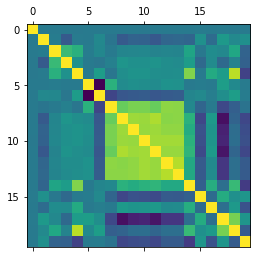

In [164]:
plt.matshow(df_raw.corr())

From the matrix of correlation it can be clearly seen that there are some variables that are highly correlated and shouldnt be accounted in the model creation. 

These can be classified in 2 different categories. 

The ones related with the phone services and the ones related with the internet services 

Regarding the phone variables: the multiple lines variable is highly correlated with the phone service one, so the phone service only should be included in the set 

Regarding the internet related variables: the online security, online backup, device protection, techsupport, streamingtv and streaming movies are highly correlated between each other and with the Internet service column so we can exclude them from the model.

The efforts behind this analysis is to avoid multicollinearity at the time of the creation of the model. 




### Final comments 

The initial hypothesis is around if the type of contract is influencing somehow how do the type of contract can be one of the main factors influencing the churning of customers 

Only with slicing it and creating clusters regarding the total payments it can be seen how this hypothesis starts to take shape

On top of that multicollinearity shows how it is important to take out variables that in the end can make confusing the output of the model 

